# Evaluated Exercise IV B
## Sentiment Analysis

## Data IO and Package import

In [11]:
import pandas as pd
import seaborn as sns

import spacy 
 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [12]:
# Data import from raw git

url = r'https://raw.githubusercontent.com/jandroi/3_2_BD/main/hotelSatisfaction_English.csv'
df =pd.read_csv(url,engine='python',encoding='latin-1')

In [13]:
df.head()

,Comments,OverallSentiment
0,Rooms were clean.,positive
1,Excellent value for money,positive
2,Parking too small. No free wifi in rooms. No c...,negative
3,"Comfortable rooms, outstanding breakfast, nice...",positive
4,Quiet location right on the beach.,positive


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


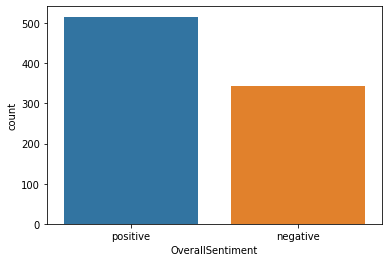

In [14]:
# Check the distribution 

sns.countplot(df["OverallSentiment"])

## NLP


In [15]:
# import English model
from spacy.lang.en import English
# stop word list
from spacy.lang.en.stop_words import STOP_WORDS
# import string
import string

In [16]:
# Create a list of punctuation marks we want to delete
punctuation = string.punctuation

In [17]:
# Set up our nlp model
nlp = spacy.load('en')

In [18]:
# Create a list of stopwords
stop_words = STOP_WORDS

In [19]:
# Parser
parser = English()

In [20]:
# Creating a tokenizer function:
def spacy_tokenizer(sentence):
  # Creating our token object, which is used to create documents with linguistic annotations.
  mytokens = parser(sentence)
  # Lemmatizing each token and converting each token into lowercase
  mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "PRON-" else word.lower_ for word in mytokens ]
  # Removing stop words
  mytokens = [word for word in mytokens if word not in stop_words and word not in punctuation]
  # return preprocessed list of tokens
  return mytokens

In [21]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [22]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Generate the data
X = df['Comments'] # the features we want to analyze
ylabels = df['OverallSentiment'] # labels or sentiments

In [25]:
# Please split the data into X_train, X_test, y_train and y_test!
# 2 minutes until 12:45h
X_train, X_test, y_train , y_test = train_test_split(X, ylabels, test_size = 0.3)

## Modeling

In [26]:
# Model Init
lrc = LogisticRegression()
mnb = MultinomialNB()
rfc = RandomForestClassifier()

In [27]:
# Create the pipeline
lr_pipe = Pipeline([("vectorizer", bow_vector), # bag of words vector
                 ("classifier", lrc)]) # LogReg

mnb_pipe = Pipeline([("vectorizer", bow_vector), # bag of words vector
                  ("classifier", mnb)]) # Naive Bayes

rfc_pipe = Pipeline([("vectorizer", bow_vector), # bag of words vector
                  ("classifier", rfc)]) # Random Forest


In [28]:
lr_pipe.fit(X_train, y_train)
mnb_pipe.fit(X_train, y_train)
rfc_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spac...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [29]:
lr_pred = lr_pipe.predict(X_test)
mnb_pred = mnb_pipe.predict(X_test)
rfc_pred = rfc_pipe.predict(X_test)

### Model Evaluation

In [32]:
print("linear regression:  ", metrics.accuracy_score(y_test, lr_pred))
print('Mult Naive Bayes: ',metrics.accuracy_score(y_test, mnb_pred))
print('Random Forest Regressor: ', metrics.accuracy_score(y_test, rfc_pred))

linear regression:   0.875968992248062
Mult Naive Bayes:  0.8527131782945736
Random Forest Regressor:  0.8527131782945736


In [33]:
print(metrics.confusion_matrix(y_test,lr_pred))

[[ 86  17]
 [ 15 140]]


In [34]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

    negative       0.85      0.83      0.84       103
    positive       0.89      0.90      0.90       155

    accuracy                           0.88       258
   macro avg       0.87      0.87      0.87       258
weighted avg       0.88      0.88      0.88       258



### Gridsearch for Best Hyperparameters

In [35]:
param_grid = {'classifier__alpha': [0.001, 0.01, .1], 'classifier__fit_prior':[True, False]}
search = GridSearchCV(mnb_pipe, param_grid, cv=5)

In [36]:
search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [37]:
RCV_pred = search.predict(X_test)

In [38]:
print(metrics.accuracy_score(y_test, RCV_pred))

0.875968992248062


In [39]:
print(metrics.classification_report(y_test,RCV_pred))

              precision    recall  f1-score   support

    negative       0.87      0.82      0.84       103
    positive       0.88      0.92      0.90       155

    accuracy                           0.88       258
   macro avg       0.87      0.87      0.87       258
weighted avg       0.88      0.88      0.88       258



In [40]:
search.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x7fe59e4dca60>,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=False))],
         verbose=False)